# CMSC320 Final Tutorial: Analysis of NBA Team Performance based on Position and Team-Aggregated Statistics
### Team Members: Aadria Bagchi, Christopher Li, Mudit Mathur, Bhargav Tumkur


# Introduction

The National Basketball Association (NBA) is one of the most followed leagues in the world, averaging about 1.6 million viewers in 2022. There is an extremely large amount of data that is collected from NBA games, allowing for data scientists and analysts to make many different predictions and conclusions about NBA teams and players. Data science is constantly being used in the league itself to help teams make the best trades, build the best squads, and win the most championships. 

For this project, our group wanted to analyze the performance of different teams in the NBA based on specific positions and team-aggregated statistics. What exactly does this mean? Well, our group is interested in seeing if a team's success or lack thereof can be attributed to the performance of certain positions on the court or the average team performance as a whole. Specifically, for this project, we are looking at the performance of Point Guards. Point Guards are seen as the players that "run" the offense. They are supposed to constantly circulate the ball and create scoring opportunities for the team, while usually also being the team's best dribbler and passer. Now, the role of the Point Guard has changed an awful lot over the past years. With the rise of players like Stephen Curry, attributes like 3-point shooting have become seen as an important part of being a Point Guard. This raises some interesting questions. Does the role of a Point Guard hold more significance to a team's success than the average player? Should Point Guards be trained differently in order to optimize a team's success? We hope to answer some of these questions throughout this tutorial. 

Now why is this important? Well, we hope to make a conclusion on whether the role of the Point Guard has the most significance on the game of basketball. If they do, should NBA teams place a greater emphasis on acquiring better Point Guards? Should teams alter their tactics and training in order to suit their Point Guard, so that they can have a greater influence on the game? If Point Guards don't hold that significance, do other positions hold major significance?

For this project, we will be looking at NBA data from 1997 and on (this is first year that shooting data was made available). We will be analyzing team average statistics such as shooting, assisting, rebounding, etc. We will also specifically be analyzing the Point Guards from 1997 on. How do their shooting statistics (Free Throw/3-Point Percentage) match up to the rest of the team? How does their assisting match up to the rest of the team? 

Through the following Data Science Lifecycle, we hope to conclude whether Point Guards are the most important position in the NBA.

1. Data Collection
2. Data Processing
3. Explanatory Analysis + Data Visualization 
4. Modeling: Analysis, Hypothesis Testing, Machine Learning
5. Interpretation: Insights + Policy Decision

# Data Collection 

The first stage of the Data Science Lifecycle is collecting the data that we want to use. Our goal was to find a database that contained specific team data and also specific player data. After looking through a few different databases, we chose to use the ones from https://www.basketball-reference.com/, because the site was reputable and contained centralized data. 

Below are all our imports and packages that we will be using. 

In [ ]:
# all of the imports are listed here, along with standard options

import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import numpy as np
from numpy import nan
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, accuracy_score)
from scipy.stats import f_oneway as ANOVA
import seaborn as sns
from scipy.stats import ttest_ind as t_test
import statistics


## Scraping Player Data

First, we are going to scrape the player data from the database. On the website, there is a page for each year that contains the regular season data for all the players that played in the NBA that year. We are going to loop through the different pages in order to collect the player data for each year. 

We will use BeautifulSoup in order to scrape the data, prettify it, and then store it in a DataFrame, df. We also have a DataFrame called PlayerDatadf that will store all the player data from 1997-2023. 

Here are a couple of things to note during this process: As you can see, in this cell, we are only looping through the 1997 to 2010 data. This is because the website we are accessing data from blocks users when they access more than 20 pages in a minute. This is an important concept as websites sometimes limit HTTP requests in order to promote safety and prevent bots from overaccessing the server. 

Another thing that we had to do during this process was drop certain rows from our DataFrame. Because the online database was so long and required a lot of scrolling to get through, there are certain positions were the database repeated the column names so that the reader could remember what each statistic meant. However, that meant that there were certain rows in df whose values were just the column names (ex. Player: "Player"). So, we only take all the rows that don't have the value for 'Player' as "Player". This successfully drops all the unnecessary rows. 

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import numpy as np
from numpy import nan
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

# will store player data from 1997 to 2023
PlayerDatadf = pd.DataFrame()

for year in range(1997,2010):
    # here we are getting the data from the website, and extracting its html contents
    response = requests.get(f'https://www.basketball-reference.com/leagues/NBA_{str(year)}_per_game.html')
    html_content = response.text

    soup = BeautifulSoup(html_content, 'html.parser')
    table = soup.find('table', attrs={'id':'per_game_stats'})
    table.prettify()

    df = pd.read_html(str(table))[0]

    # dropping rows that say "Player"
    df = df[df["Player"] != "Player"]

    # adding column for year
    df["Year"] = year

    # adding data from current year to the PlayerDatadf
    PlayerDatadf = pd.concat([PlayerDatadf, df])



Here we are doing the same exact thing as above, but this is for the data from 2010 to 2023. 

In [ ]:
# split this data collection into two cells to avoid being banned from the website
for year in range(2010,2024):
    # here we are getting the data from the website, and extracting its html contents
    response = requests.get(f'https://www.basketball-reference.com/leagues/NBA_{str(year)}_per_game.html')
    html_content = response.text

    soup = BeautifulSoup(html_content, 'html.parser')
    table = soup.find('table', attrs={'id':'per_game_stats'})
    table.prettify()

    df = pd.read_html(str(table))[0]

    # dropping rows that say "Player"
    df = df[df["Player"] != "Player"]

    # adding column for year
    df["Year"] = year

    # adding data from current year to the PlayerDatadf
    PlayerDatadf = pd.concat([PlayerDatadf, df])


## Scraping Advanced Player Data

Let's repeat with the advanced player data.

In [ ]:
# will store player data from 1997 to 2023
PlayerDataAdvanceddf = pd.DataFrame()



for year in range(1997,2010):
    # here we are getting the data from the website, and extracting its html contents
    response = requests.get(f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html')
    html_content = response.text

    soup = BeautifulSoup(html_content, 'html.parser')
    table = soup.find('table', attrs={'id':'advanced_stats'})
    table.prettify()

    df = pd.read_html(str(table))[0]

    # dropping rows that say "Player"
    df = df[df["Player"] != "Player"]

    # adding column for year
    df["Year"] = year

    # adding data from current year to the PlayerDatadf
    PlayerDataAdvanceddf = pd.concat([PlayerDataAdvanceddf, df])

<ipython-input-5-215e45d43a3b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = year


In [ ]:
for year in range(2010,2024):
    # here we are getting the data from the website, and extracting its html contents
    response = requests.get(f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html')
    html_content = response.text

    soup = BeautifulSoup(html_content, 'html.parser')
    table = soup.find('table', attrs={'id':'advanced_stats'})
    table.prettify()

    df = pd.read_html(str(table))[0]

    # dropping rows that say "Player"
    df = df[df["Player"] != "Player"]

    # adding column for year
    df["Year"] = year

    # adding data from current year to the PlayerDatadf
    PlayerDataAdvanceddf = pd.concat([PlayerDataAdvanceddf, df])
PlayerDataAdvanceddf.drop(columns = {'Unnamed: 19','Unnamed: 24'})

# We can go ahead and merge the advanced data with the previous player data on the player and year. We will add _drop suffix to duplicate columns so we can drop it later
PlayerDatadf = pd.merge(PlayerDatadf,PlayerDataAdvanceddf, on=['Player','Year'],suffixes=('', '_drop'))

# drop the unused or unneeded columns
PlayerDatadf = PlayerDatadf.drop(columns = {'Unnamed: 19','Unnamed: 24'})
PlayerDatadf = PlayerDatadf.drop([col for col in PlayerDatadf.columns if '_drop' in col], axis=1)

# convert all columns from column 5 and all to their numeric values
for column in PlayerDatadf.columns[5:]:
    PlayerDatadf[column] = pd.to_numeric(PlayerDatadf[column], errors='coerce')

## Scraping Win Percentages and Standings

Now, we will be scraping the team data from the database. On the pages that contain the team statistics for some year, there are multiple different tables of statistics. Because of this, we call find_all() and pick the specific table that we need. 

Like the player data, there is a separate page for all the team data from a specific year. We will be looping through all the pages and collecting the team data from each year.

Once again, we will use BeautifulSoup in order to scrape the data, prettify it, and then store it in a DataFrame. We are creating a DataFrame called ExpandedStandings_df that will contain all the team data from 1997 to 2023. We will be initializing the DataFrame to just contain the team data from 1997.

In [ ]:
response = requests.get(f'https://www.basketball-reference.com/leagues/NBA_1997_standings.html', headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36 OPR/94.0.0.0", "From":"christopherli33064@gmail.com"})
html_content = response.text
html_content = html_content.replace("<!--", "")
html_content = html_content.replace("-->", "")
# here we use Beautiful soup to parse that html content, and then prettify it
soup = BeautifulSoup(html_content, 'html.parser')
tables = soup.find_all('table',{'class','sortable stats_table'})
ExpandedStandings_df = pd.read_html(str(tables[0]))[0]
ExpandedStandings_df['Year'] = 1997


Here we are repeating the same process that we described above but for the years 1998 to 2009. Again, we are splitting the years because of the limit on HTTP requests on the website.

In [ ]:
for year in range(1998,2010):
    response = requests.get(f'https://www.basketball-reference.com/leagues/NBA_{year}_standings.html', headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36 OPR/94.0.0.0", "From":"christopherli33064@gmail.com"})
    html_content = response.text
    html_content = html_content.replace("<!--", "")
    html_content = html_content.replace("-->", "")
    # here we use Beautiful soup to parse that html content, and then prettify it
    soup = BeautifulSoup(html_content, 'html.parser')
    tables = soup.find_all('table',{'class','sortable stats_table'})
    current = pd.read_html(str(tables[0]))[0]
    current['Year'] = year
    ExpandedStandings_df = pd.concat([ExpandedStandings_df,current])




1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


Again, we are repeating the same process but for the years 2010 to 2023.

In [ ]:
for year in range(2010,2024):
    response = requests.get(f'https://www.basketball-reference.com/leagues/NBA_{year}_standings.html', headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36 OPR/94.0.0.0", "From":"christopherli33064@gmail.com"})
    html_content = response.text
    html_content = html_content.replace("<!--", "")
    html_content = html_content.replace("-->", "")
    # here we use Beautiful soup to parse that html content, and then prettify it
    soup = BeautifulSoup(html_content, 'html.parser')
    tables = soup.find_all('table',{'class','sortable stats_table'})
    current = pd.read_html(str(tables[0]))[0]
    current['Year'] = year
    ExpandedStandings_df = pd.concat([ExpandedStandings_df,current])


### To finish up our data collection, we will do a couple of things:

Firstly, we are dropping one of the levels of the DataFrame because it included headers/columns that we will not be using for the project.

In [ ]:
ExpandedStandings_df.columns = ExpandedStandings_df.columns.droplevel(0)

Secondly, we are renaming one of the columns in the DataFrame to "Year". 

Lastly, we are utilizing a lambda function in order to calculate the win percentage of each team during a certain year. We will add this as a column to our DataFrame, titled "Win Rate". 

In [ ]:
ExpandedStandings_df = ExpandedStandings_df.rename(columns={ExpandedStandings_df.columns[-8]: 'Year'})

ExpandedStandings_df['Win Rate'] = ExpandedStandings_df['Overall'].apply(lambda overall: int(overall.split("-")[0])/(int(overall.split("-")[0]) + int(overall.split("-")[1])) )

In [ ]:
ExpandedStandings_df["Top 10"] = 0

for index, row in ExpandedStandings_df.iterrows():
  if float(row["Rk"]) <= 10:
    ExpandedStandings_df.at[index, "Top 10"] = 1

ExpandedStandings_df.head()

,Rk,Team,Overall,Home,Road,E,W,A,C,M,P,Pre,Post,≤3,≥10,Nov,Dec,Jan,Feb,Mar,Apr,Year,Oct,May,SE,NW,SW,Jul,Aug,Win Rate,Top 10
0,1,Chicago Bulls,69-13,39-2,30-11,44-10,25-3,20-6,24-4,12-2,13-1,42-6,27-7,9-4,45-4,15-1,12-3,13-1,10-2,12-2,7-4,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.841463,1
1,2,Utah Jazz,64-18,38-3,26-15,23-7,41-11,13-1,10-6,19-5,22-6,33-14,31-4,3-5,36-5,11-2,11-5,9-6,9-3,14-1,10-1,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780488,1
2,3,Miami Heat,61-21,29-12,32-9,40-14,21-7,16-8,24-6,11-3,10-4,36-12,25-9,15-4,31-6,12-4,11-3,9-5,10-3,11-3,8-3,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743902,1
3,4,Houston Rockets,57-25,30-11,27-14,17-13,40-12,9-5,8-8,19-5,21-7,32-16,25-9,6-3,27-13,15-1,9-5,8-7,5-7,11-3,9-2,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.695122,1
4,5,New York Knicks,57-25,31-10,26-15,38-16,19-9,19-6,19-10,10-4,9-5,34-14,23-11,9-4,23-10,9-5,12-3,11-5,10-3,9-5,6-4,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.695122,1


# Exploratory Data Analysis and Visualizations

Before we get into any super rigorous data analysis or machine learning, let's take an exploratory look at our data. First let's visualized of the point guard vs the team. Since we want to view the impact of the position rather than a specific player let's first create a function that allows us to take a weighted average based on minutes played.

In [ ]:
# The custom_weighted_avg function will take in data and for each of the columns specified return a pandas series object with the column's weighted average. The weights will be the minutes played.
def custom_weighted_avg(data): 
    cols = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP' ]
    # Use np.nan_to_num() to replace NaN values with 0
    weights = np.nan_to_num(data['MP'].values)
    subset = np.nan_to_num(data[cols])
    weighted_avg = np.average(subset, weights=weights, axis=0)
    return pd.Series(weighted_avg, index=cols)


Now that we have a way to find the weighted averages let's take a look at some weighted averages of entire teams vs just the point guard weighted averages

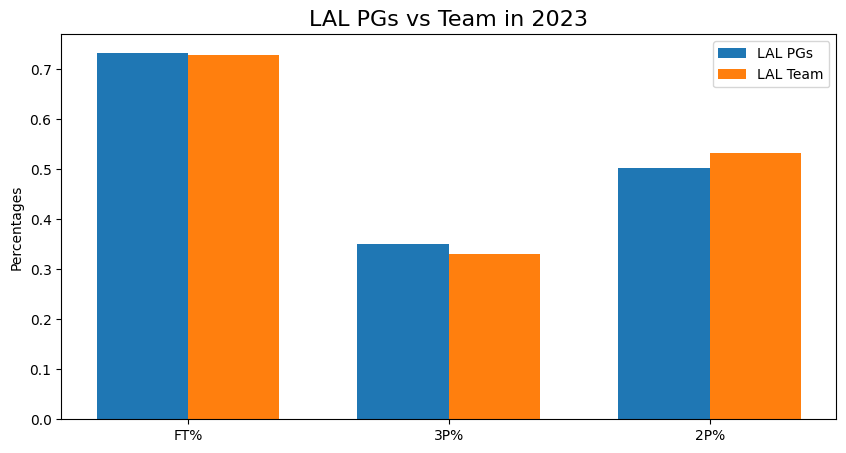

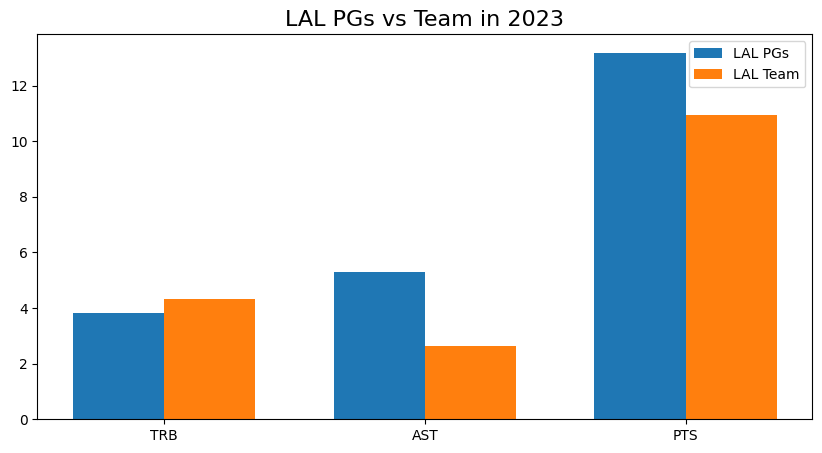

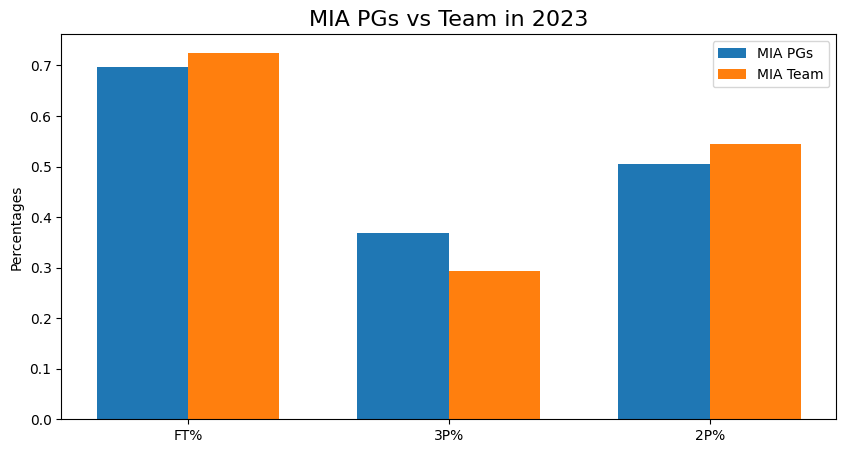

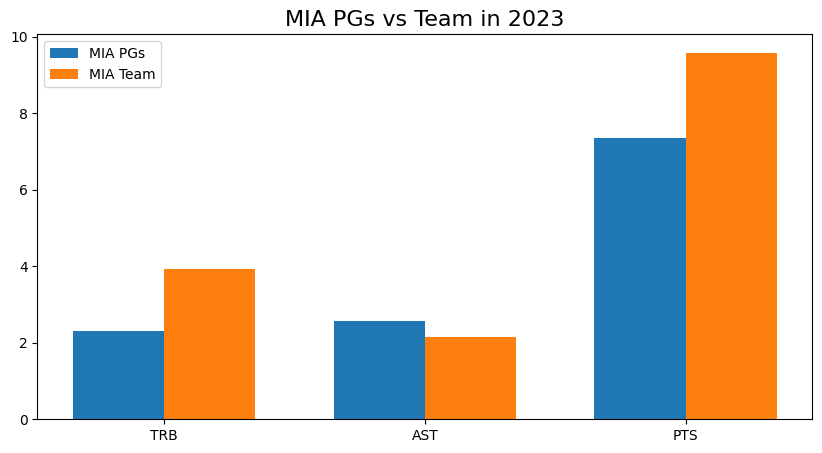

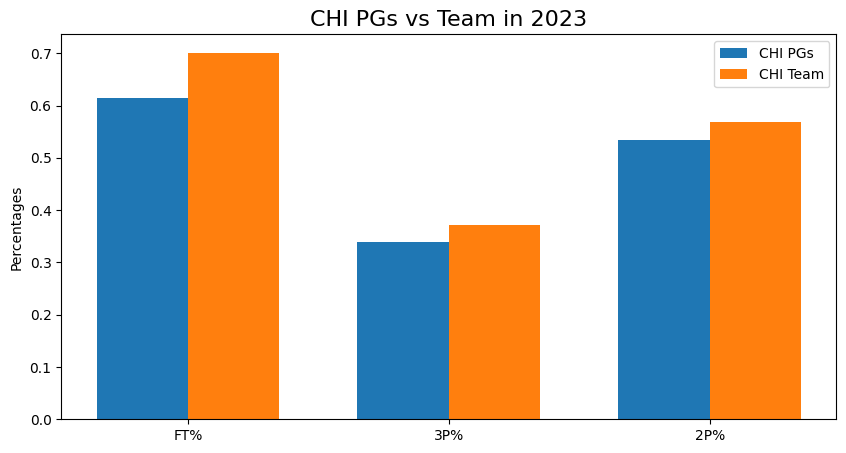

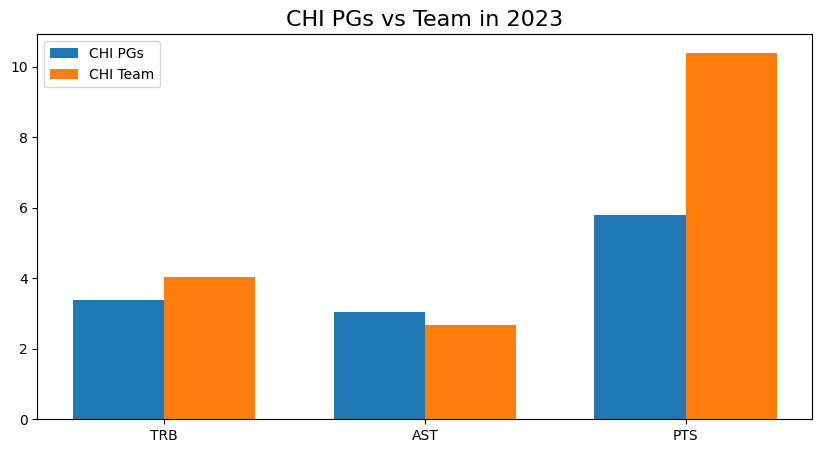

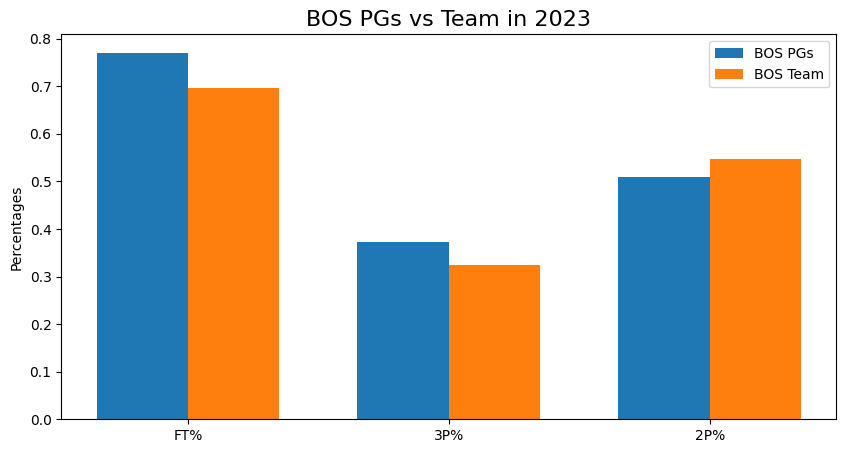

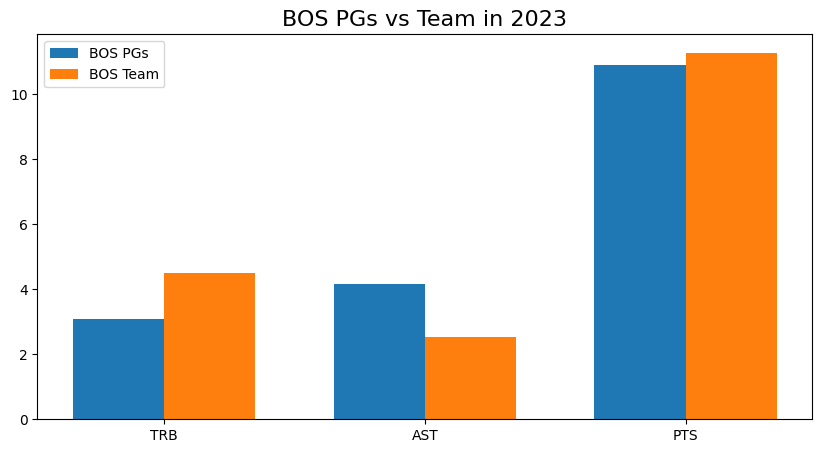

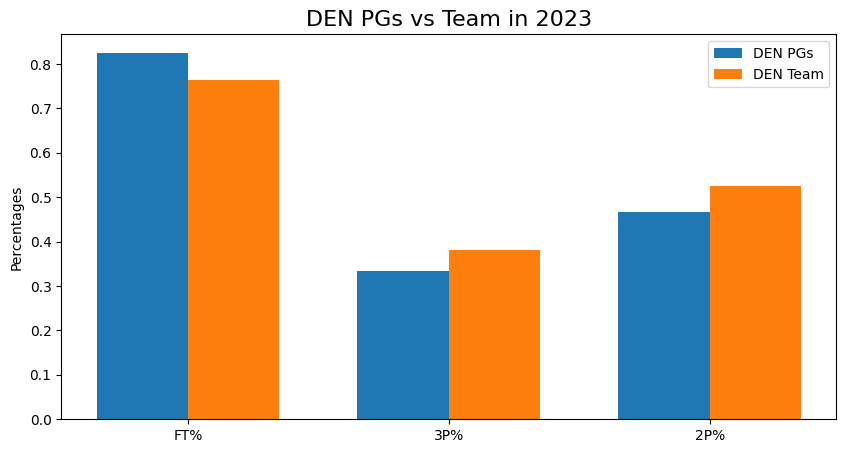

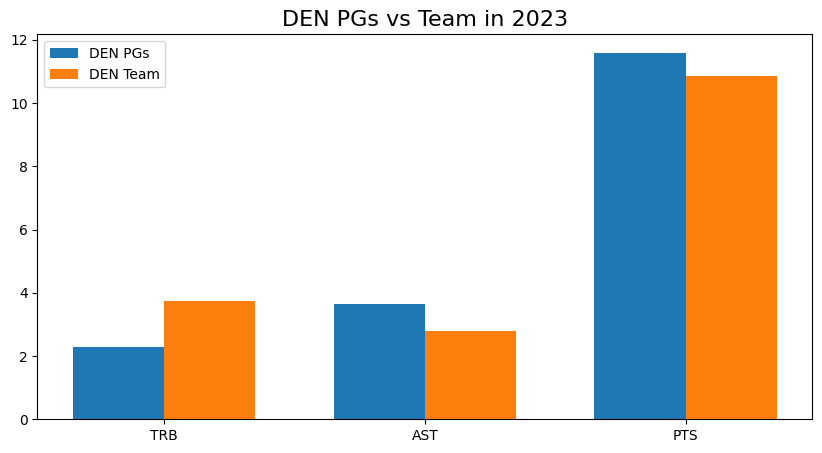

In [ ]:
YEAR = 2023
POSITION = "PG"
TeamCodesToAnalyze = ['LAL','MIA','CHI','BOS', 'DEN']
for teamCode in TeamCodesToAnalyze:
    # retreieve player data that played on a certain team
    currentTeamdf = PlayerDatadf[PlayerDatadf["Tm"]==teamCode]
    # group that team's player data by year and position and store it in a dataframe that has weighted averages for each position for each year
    currentTeamPositionWeightedAvgdf = currentTeamdf.groupby(['Year', 'Pos']).apply(custom_weighted_avg)
    # do the same except eithout grouping by position to get a weighted average for the whole team
    currentTeamWeightedAvgdf= currentTeamdf.groupby(['Year']).apply(custom_weighted_avg)
    # Retrieve the poing guard's weight average data
    currentTeamPGWeightedAvgdf = currentTeamPositionWeightedAvgdf.xs(POSITION, level='Pos')
    # Select columns to plot
    columns_to_plot = ['FT%','3P%', '2P%']
    
    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 5))

    # Get the row for year 2018
    curr = currentTeamPGWeightedAvgdf.loc[YEAR]

    # Set the width of each bar
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    pos = np.arange(len(columns_to_plot))

    # Plot the position data
    ax.bar(pos - bar_width/2, curr[columns_to_plot], width=bar_width, label=f'{teamCode} PGs')

    # Get the row for year 2018
    currTeam = currentTeamWeightedAvgdf.loc[YEAR]

    # Plot the team data
    ax.bar(pos + bar_width/2, currTeam[columns_to_plot], width=bar_width, label=f'{teamCode} Team')

    # Add labels, title, and legend
    ax.set_ylabel('Percentages')
    ax.set_xticks(pos)
    ax.set_xticklabels(columns_to_plot)
    ax.set_title(f'{teamCode} PGs vs Team in {YEAR}', fontsize=16)
    ax.legend()

    # Show the plot
    plt.show()
    
    # The previous columns were percentages. Let's plot these on a different graph


    columns_to_plot = ['TRB', 'AST', 'PTS']

    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 5))

    # Get the row for year 2018
    curr = currentTeamPGWeightedAvgdf.loc[YEAR]

    # Set the width of each bar
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    pos = np.arange(len(columns_to_plot))

    # Plot the position data
    ax.bar(pos - bar_width/2, curr[columns_to_plot], width=bar_width, label=f'{teamCode} PGs')

    # Get the row for year 2018
    currTeam = currentTeamWeightedAvgdf.loc[YEAR]

    # Plot the team data
    ax.bar(pos + bar_width/2, currTeam[columns_to_plot], width=bar_width, label=f'{teamCode} Team')

    # Add labels, title, and legend
    ax.set_xticks(pos)
    ax.set_xticklabels(columns_to_plot)
    ax.set_title(f'{teamCode} PGs vs Team in {YEAR}', fontsize=16)
    ax.legend()

    # Show the plot
    plt.show()

After getting that initial glance at some initial findings or relationships between pieces of data, let's see how in general the point guard position affects winning. Let's visualize a weighted point guard VORP (Value over replacement or points per 100 possesions over replacement) vs the winning percentage of his team over the last 20 years or so.

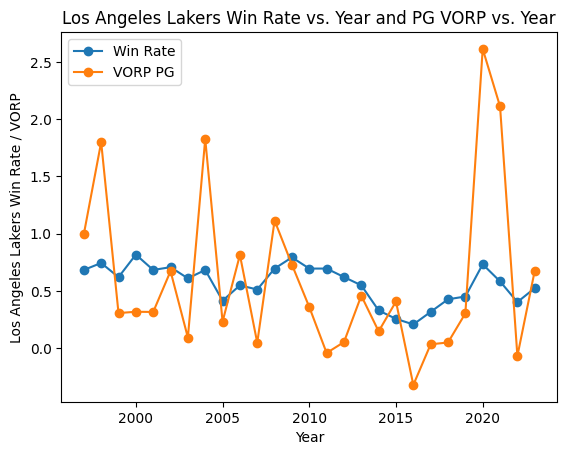

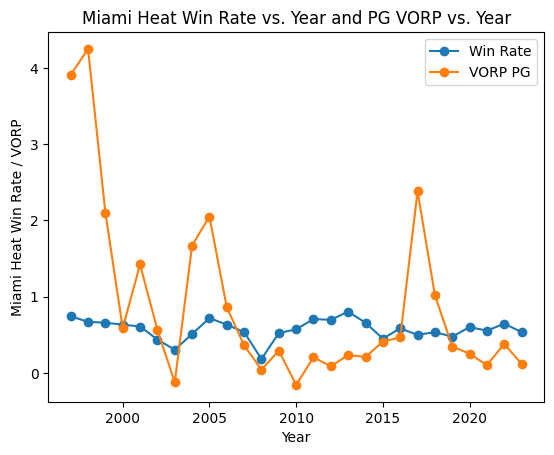

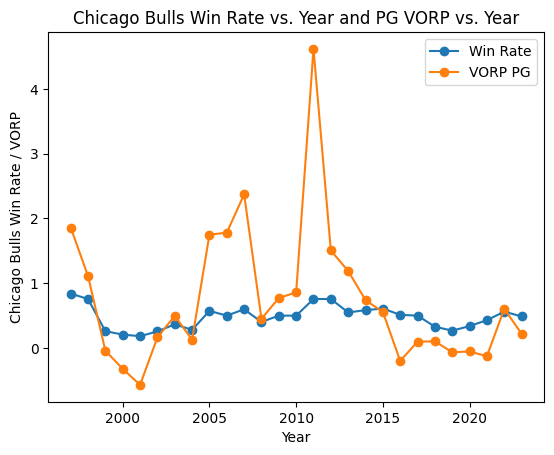

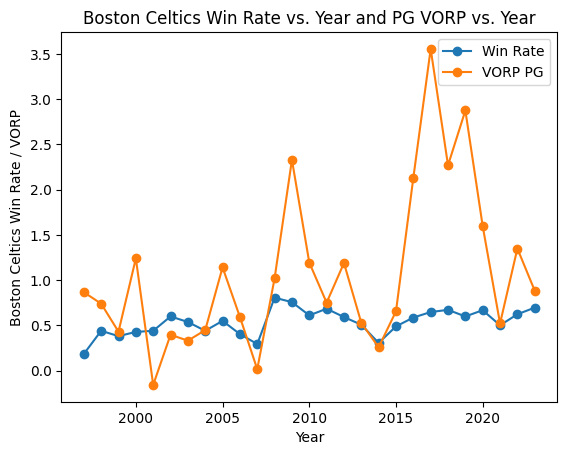

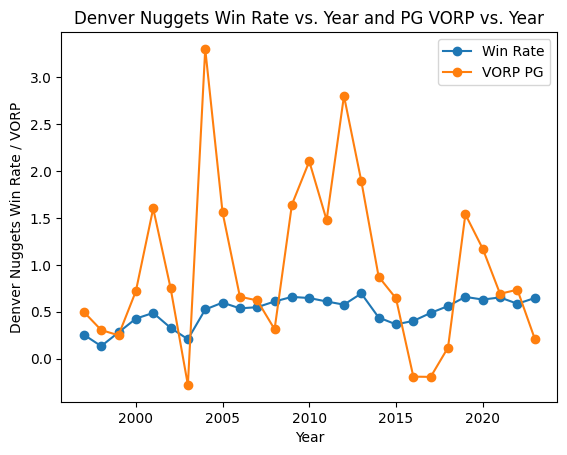

In [ ]:
"""
Plot Teams Win Rate vs Years
"""
TeamCodesToAnalyze = ['LAL','MIA','CHI','BOS', 'DEN']
TeamsToAnalyze = ['Los Angeles Lakers','Miami Heat','Chicago Bulls','Boston Celtics', 'Denver Nuggets']
for i,team in enumerate(TeamsToAnalyze):
    # create a dataframe storing just the year and win rate
    df = ExpandedStandings_df[ExpandedStandings_df['Team']==team].loc[:,['Year', 'Win Rate']]
    # identify the player data based on the corresponding team code
    currentTeamdf = PlayerDatadf[PlayerDatadf["Tm"]==TeamCodesToAnalyze[i]]
    currentTeamPositionWeightedAvgdf = currentTeamdf.groupby(['Year', 'Pos']).apply(custom_weighted_avg)
    currentTeamPGWeightedAvgdf = currentTeamPositionWeightedAvgdf.xs(POSITION, level='Pos')
    currentTeamWeightedAvgdf= currentTeamdf.groupby(['Year']).apply(custom_weighted_avg)
    
    fig, ax = plt.subplots()
    
    # plot win rate vs year
    df.set_index('Year', inplace=True)
    df.plot(kind='line', marker='o', ax=ax)
    # plot each year's point guard weighted average vorp
    columns_to_plot = ['VORP']
    for stat in columns_to_plot:
        currentTeamPGWeightedAvgdf[stat].plot(kind='line', marker='o', ax=ax, label=stat + " PG")

    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{team} Win Rate / VORP')
    ax.set_title(f'{team} Win Rate vs. Year and {POSITION} VORP vs. Year')
    plt.show()


After visualizing some of the data, there doesn't seem to be any obvious conclusions we can come to. Let's take a closer look at our data.

# Data Processing
In this section of the Data Science Lifecycle we are going to be organizing and manipulating all of the data we just collected in order to prepare it for use in analysis and modeling. Data processing in the real world, along with data collection, is one of the most time intensive steps in the data science process — and its role in the tutorial is no exception! As you follow along, you'll see that there is extensive work to be done to prepare the data we've just collected for later use in Exploratory Analysis, Visualization, and Linear Regression.

For the purposes of this tutorial we have randomly selected 5 NBA Teams to analyze: The Chicago Bulls, Denver Nuggets, Miami Heat, Boston Celtics, and Los Angeles Lakers. For each team we'll begin by organizing the statistics we want to use, resulting in 5 cleaner individual dataframes.

In [ ]:
# we want to remove players that played for more than one team in a season because their stats are aggregated, and will then not accurately predict a specific team's win rate
PlayerDatadf = PlayerDatadf[PlayerDatadf["Tm"] != "TOT"]
PlayerDatadf["Tm"].value_counts()

# for the sake of being concise, we are going to select 5 teams to analyze
teams_list = ["CHI", "DEN", "MIA", "BOS", "LAL"]
PlayerDatadf = PlayerDatadf[PlayerDatadf["Tm"].isin(teams_list)]
PlayerDatadf = PlayerDatadf.reset_index(drop=True)

# for ease of analysis, let's now make separate dataframes for each team
ChiPlayerDatadf = PlayerDatadf[PlayerDatadf["Tm"] == "CHI"]
ChiPlayerDatadf = ChiPlayerDatadf.reset_index(drop=True)

DenPlayerDatadf = PlayerDatadf[PlayerDatadf["Tm"] == "DEN"]
DenPlayerDatadf = DenPlayerDatadf.reset_index(drop=True)

MiaPlayerDatadf = PlayerDatadf[PlayerDatadf["Tm"] == "MIA"]
MiaPlayerDatadf = MiaPlayerDatadf.reset_index(drop=True)

BosPlayerDatadf = PlayerDatadf[PlayerDatadf["Tm"] == "BOS"]
BosPlayerDatadf = BosPlayerDatadf.reset_index(drop=True)

LalPlayerDatadf = PlayerDatadf[PlayerDatadf["Tm"] == "LAL"]
LalPlayerDatadf = LalPlayerDatadf.reset_index(drop=True)

For each of the five teams we'll now repeat the same process, where we filter the columns present, and then create a new DataFrame to store Organized data. For each team the average point guard statistics and averaged team player statistics need to be calculated, and then stored in the new DataFrame. 

### Data wrangling for the Lakers stats

In [ ]:
# okay let's first organize the Lakers data, and then do the same transformations on the other teams' data
LalPlayerDatadf = LalPlayerDatadf[['Pos', 'Tm', '3P%', '2P%', 'FT%', 'PTS', 'TRB', 'AST', 'Year']]
LalPlayerDatadf

# let's create a new dataframe that contains the average stats for the team's PG(s) in that year, as well as all teammates' average stats for the year
LalOrganizedData = {
    'Year': [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'PG 3P%': [0]*27,
    'PG 2P%': [0]*27,
    'PG FT%': [0]*27,
    'PG PTS': [0]*27,
    "PG TRB": [0]*27,
    "PG AST": [0]*27,
    'Team 3P%': [0]*27,
    'Team 2P%': [0]*27,
    'Team FT%': [0]*27,
    'Team PTS': [0]*27,
    "Team TRB": [0]*27,
    "Team AST": [0]*27,
}

LalOrganizedDatadf = pd.DataFrame.from_dict(LalOrganizedData)

# okay we're gonna wanna go by year, average the stats for each category, and then store them in the respective row in LalOrganizedDatadf
for year in range(1997,2024):
  player_count = 0
  pg_count = 0
  team3psum = 0
  team2psum = 0
  teamftsum = 0
  teamptsum = 0
  teamrbsum = 0
  teamastsum = 0
  pg3psum = 0
  pg2psum = 0
  pgftsum = 0
  pgptsum = 0
  pgrbsum = 0
  pgastsum = 0
  for index,row in LalPlayerDatadf.iterrows():
    if row["Year"] == year:
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        player_count += 1
        team3psum += float(row["3P%"])
        team2psum += float(row["2P%"])
        teamftsum += float(row["FT%"])
        teamptsum += float(row["PTS"])
        teamrbsum += float(row["TRB"])
        teamastsum += float(row["AST"])
    if row["Year"] == year and row["Pos"] == "PG":
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        pg_count += 1
        pg3psum += float(row["3P%"])
        pg2psum += float(row["2P%"])
        pgftsum += float(row["FT%"])
        pgptsum += float(row["PTS"])
        pgrbsum += float(row["TRB"])
        pgastsum += float(row["AST"])
  
  # now let's get the averages for this year, and store them in LalOrganizedDatadf
  team3pp = team3psum/player_count
  team2pp = team2psum/player_count
  teamftp = teamftsum/player_count
  teampts = teamptsum/player_count
  teamrb = teamrbsum/player_count
  teamast = teamastsum/player_count

  pg3pp = pg3psum/pg_count
  pg2pp = pg2psum/pg_count
  pgftp = pgftsum/pg_count
  pgpts = pgptsum/pg_count
  pgrb = pgrbsum/pg_count
  pgast = pgastsum/pg_count

  # store all averages in the appropriate rows of the Organized dataframe
  rownum = year - 1997
  LalOrganizedDatadf.at[rownum, "PG 3P%"] = pg3pp
  LalOrganizedDatadf.at[rownum, "PG 2P%"] = pg2pp
  LalOrganizedDatadf.at[rownum, "PG FT%"] = pgftp
  LalOrganizedDatadf.at[rownum, "PG PTS"] = pgpts
  
  LalOrganizedDatadf.at[rownum, "Team 3P%"] = team3pp
  LalOrganizedDatadf.at[rownum, "Team 2P%"] = team2pp
  LalOrganizedDatadf.at[rownum, "Team FT%"] = teamftp
  LalOrganizedDatadf.at[rownum, "Team PTS"] = teampts

  LalOrganizedDatadf.at[rownum, "PG TRB"] = pgrb
  LalOrganizedDatadf.at[rownum, "PG AST"] = pgast
  LalOrganizedDatadf.at[rownum, "Team TRB"] = teamrb
  LalOrganizedDatadf.at[rownum, "Team AST"] = teamast

### Data Wrangling for the Celtics stats

In [ ]:
# okay let's next organize the Celtics data, and then do the same transformations on the other teams' data
BosPlayerDatadf = BosPlayerDatadf[['Pos', 'Tm', '3P%', '2P%', 'FT%', 'PTS', 'TRB', 'AST', 'Year']]
BosPlayerDatadf

# let's create a new dataframe that contains the average stats for the team's PG(s) in that year, as well as all teammates' average stats for the year
BosOrganizedData = {
    'Year': [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'PG 3P%': [0]*27,
    'PG 2P%': [0]*27,
    'PG FT%': [0]*27,
    'PG PTS': [0]*27,
    "PG TRB": [0]*27,
    "PG AST": [0]*27,
    'Team 3P%': [0]*27,
    'Team 2P%': [0]*27,
    'Team FT%': [0]*27,
    'Team PTS': [0]*27,
    "Team TRB": [0]*27,
    "Team AST": [0]*27,
}

BosOrganizedDatadf = pd.DataFrame.from_dict(BosOrganizedData)

# okay we're gonna wanna go by year, average the stats for each category, and then store them in the respective row in BosOrganizedDatadf
for year in range(1997,2024):
  player_count = 0
  pg_count = 0
  team3psum = 0
  team2psum = 0
  teamftsum = 0
  teamptsum = 0
  teamrbsum = 0
  teamastsum = 0
  pg3psum = 0
  pg2psum = 0
  pgftsum = 0
  pgptsum = 0
  pgrbsum = 0
  pgastsum = 0
  for index,row in BosPlayerDatadf.iterrows():
    if row["Year"] == year:
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        player_count += 1
        team3psum += float(row["3P%"])
        team2psum += float(row["2P%"])
        teamftsum += float(row["FT%"])
        teamptsum += float(row["PTS"])
        teamrbsum += float(row["TRB"])
        teamastsum += float(row["AST"])
    if row["Year"] == year and row["Pos"] == "PG":
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        pg_count += 1
        pg3psum += float(row["3P%"])
        pg2psum += float(row["2P%"])
        pgftsum += float(row["FT%"])
        pgptsum += float(row["PTS"])
        pgrbsum += float(row["TRB"])
        pgastsum += float(row["AST"])
  
  # now let's get the averages for this year, and store them in BosOrganizedDatadf
  team3pp = team3psum/player_count
  team2pp = team2psum/player_count
  teamftp = teamftsum/player_count
  teampts = teamptsum/player_count
  teamrb = teamrbsum/player_count
  teamast = teamastsum/player_count

  pg3pp = pg3psum/pg_count
  pg2pp = pg2psum/pg_count
  pgftp = pgftsum/pg_count
  pgpts = pgptsum/pg_count
  pgrb = pgrbsum/pg_count
  pgast = pgastsum/pg_count

  # store all averages in the appropriate rows of the Organized dataframe
  rownum = year - 1997
  BosOrganizedDatadf.at[rownum, "PG 3P%"] = pg3pp
  BosOrganizedDatadf.at[rownum, "PG 2P%"] = pg2pp
  BosOrganizedDatadf.at[rownum, "PG FT%"] = pgftp
  BosOrganizedDatadf.at[rownum, "PG PTS"] = pgpts
  BosOrganizedDatadf.at[rownum, "Team 3P%"] = team3pp
  BosOrganizedDatadf.at[rownum, "Team 2P%"] = team2pp
  BosOrganizedDatadf.at[rownum, "Team FT%"] = teamftp
  BosOrganizedDatadf.at[rownum, "Team PTS"] = teampts

  BosOrganizedDatadf.at[rownum, "PG TRB"] = pgrb
  BosOrganizedDatadf.at[rownum, "PG AST"] = pgast
  BosOrganizedDatadf.at[rownum, "Team TRB"] = teamrb
  BosOrganizedDatadf.at[rownum, "Team AST"] = teamast

### Data Wrangling for the Heat stats

In [ ]:
# okay let's next organize the Heat data, and then do the same transformations on the other teams' data
MiaPlayerDatadf = MiaPlayerDatadf[['Pos', 'Tm', '3P%', '2P%', 'FT%', 'PTS', 'TRB', 'AST', 'Year']]
MiaPlayerDatadf

# let's create a new dataframe that contains the average stats for the team's PG(s) in that year, as well as all teammates' average stats for the year
MiaOrganizedData = {
    'Year': [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'PG 3P%': [0]*27,
    'PG 2P%': [0]*27,
    'PG FT%': [0]*27,
    'PG PTS': [0]*27,
    "PG TRB": [0]*27,
    "PG AST": [0]*27,
    'Team 3P%': [0]*27,
    'Team 2P%': [0]*27,
    'Team FT%': [0]*27,
    'Team PTS': [0]*27,
    "Team TRB": [0]*27,
    "Team AST": [0]*27,
}

MiaOrganizedDatadf = pd.DataFrame.from_dict(MiaOrganizedData)

# okay we're gonna wanna go by year, average the stats for each category, and then store them in the respective row in MiaOrganizedDatadf
for year in range(1997,2024):
  player_count = 0
  pg_count = 0
  team3psum = 0
  team2psum = 0
  teamftsum = 0
  teamptsum = 0
  teamrbsum = 0
  teamastsum = 0
  pg3psum = 0
  pg2psum = 0
  pgftsum = 0
  pgptsum = 0
  pgrbsum = 0
  pgastsum = 0
  for index,row in MiaPlayerDatadf.iterrows():
    if row["Year"] == year:
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        player_count += 1
        team3psum += float(row["3P%"])
        team2psum += float(row["2P%"])
        teamftsum += float(row["FT%"])
        teamptsum += float(row["PTS"])
        teamrbsum += float(row["TRB"])
        teamastsum += float(row["AST"])
    if row["Year"] == year and row["Pos"] == "PG":
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        pg_count += 1
        pg3psum += float(row["3P%"])
        pg2psum += float(row["2P%"])
        pgftsum += float(row["FT%"])
        pgptsum += float(row["PTS"])
        pgrbsum += float(row["TRB"])
        pgastsum += float(row["AST"])
  
  # now let's get the averages for this year, and store them in MiaOrganizedDatadf
  team3pp = team3psum/player_count
  team2pp = team2psum/player_count
  teamftp = teamftsum/player_count
  teampts = teamptsum/player_count
  teamrb = teamrbsum/player_count
  teamast = teamastsum/player_count

  pg3pp = pg3psum/pg_count
  pg2pp = pg2psum/pg_count
  pgftp = pgftsum/pg_count
  pgpts = pgptsum/pg_count
  pgrb = pgrbsum/pg_count
  pgast = pgastsum/pg_count

  # store all averages in the appropriate rows of the Organized dataframe
  rownum = year - 1997
  MiaOrganizedDatadf.at[rownum, "PG 3P%"] = pg3pp
  MiaOrganizedDatadf.at[rownum, "PG 2P%"] = pg2pp
  MiaOrganizedDatadf.at[rownum, "PG FT%"] = pgftp
  MiaOrganizedDatadf.at[rownum, "PG PTS"] = pgpts
  MiaOrganizedDatadf.at[rownum, "Team 3P%"] = team3pp
  MiaOrganizedDatadf.at[rownum, "Team 2P%"] = team2pp
  MiaOrganizedDatadf.at[rownum, "Team FT%"] = teamftp
  MiaOrganizedDatadf.at[rownum, "Team PTS"] = teampts

  MiaOrganizedDatadf.at[rownum, "PG TRB"] = pgrb
  MiaOrganizedDatadf.at[rownum, "PG AST"] = pgast
  MiaOrganizedDatadf.at[rownum, "Team TRB"] = teamrb
  MiaOrganizedDatadf.at[rownum, "Team AST"] = teamast

### Data Wrangling for the Nuggets stats

In [ ]:
# okay let's next organize the Nuggets data, and then do the same transformations on the other teams' data
DenPlayerDatadf = DenPlayerDatadf[['Pos', 'Tm', '3P%', '2P%', 'FT%', 'PTS', 'TRB', 'AST', 'Year']]
DenPlayerDatadf

# let's create a new dataframe that contains the average stats for the team's PG(s) in that year, as well as all teammates' average stats for the year
DenOrganizedData = {
    'Year': [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'PG 3P%': [0]*27,
    'PG 2P%': [0]*27,
    'PG FT%': [0]*27,
    'PG PTS': [0]*27,
    "PG TRB": [0]*27,
    "PG AST": [0]*27,
    'Team 3P%': [0]*27,
    'Team 2P%': [0]*27,
    'Team FT%': [0]*27,
    'Team PTS': [0]*27,
    "Team TRB": [0]*27,
    "Team AST": [0]*27,
}

DenOrganizedDatadf = pd.DataFrame.from_dict(DenOrganizedData)

# okay we're gonna wanna go by year, average the stats for each category, and then store them in the respective row in DenOrganizedDatadf
for year in range(1997,2024):
  player_count = 0
  pg_count = 0
  team3psum = 0
  team2psum = 0
  teamftsum = 0
  teamptsum = 0
  teamrbsum = 0
  teamastsum = 0
  pg3psum = 0
  pg2psum = 0
  pgftsum = 0
  pgptsum = 0
  pgrbsum = 0
  pgastsum = 0
  for index,row in DenPlayerDatadf.iterrows():
    if row["Year"] == year:
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        player_count += 1
        team3psum += float(row["3P%"])
        team2psum += float(row["2P%"])
        teamftsum += float(row["FT%"])
        teamptsum += float(row["PTS"])
        teamrbsum += float(row["TRB"])
        teamastsum += float(row["AST"])
    if row["Year"] == year and row["Pos"] == "PG":
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        pg_count += 1
        pg3psum += float(row["3P%"])
        pg2psum += float(row["2P%"])
        pgftsum += float(row["FT%"])
        pgptsum += float(row["PTS"])
        pgrbsum += float(row["TRB"])
        pgastsum += float(row["AST"])
  
  # now let's get the averages for this year, and store them in DenOrganizedDatadf
  team3pp = team3psum/player_count
  team2pp = team2psum/player_count
  teamftp = teamftsum/player_count
  teampts = teamptsum/player_count
  teamrb = teamrbsum/player_count
  teamast = teamastsum/player_count

  pg3pp = pg3psum/pg_count
  pg2pp = pg2psum/pg_count
  pgftp = pgftsum/pg_count
  pgpts = pgptsum/pg_count
  pgrb = pgrbsum/pg_count
  pgast = pgastsum/pg_count

  # store all averages in the appropriate rows of the Organized dataframe
  rownum = year - 1997
  DenOrganizedDatadf.at[rownum, "PG 3P%"] = pg3pp
  DenOrganizedDatadf.at[rownum, "PG 2P%"] = pg2pp
  DenOrganizedDatadf.at[rownum, "PG FT%"] = pgftp
  DenOrganizedDatadf.at[rownum, "PG PTS"] = pgpts
  DenOrganizedDatadf.at[rownum, "Team 3P%"] = team3pp
  DenOrganizedDatadf.at[rownum, "Team 2P%"] = team2pp
  DenOrganizedDatadf.at[rownum, "Team FT%"] = teamftp
  DenOrganizedDatadf.at[rownum, "Team PTS"] = teampts

  DenOrganizedDatadf.at[rownum, "PG TRB"] = pgrb
  DenOrganizedDatadf.at[rownum, "PG AST"] = pgast
  DenOrganizedDatadf.at[rownum, "Team TRB"] = teamrb
  DenOrganizedDatadf.at[rownum, "Team AST"] = teamast

### Data Wrangling for the Bulls stats

In [ ]:
# okay let's finally organize the Bulls data
ChiPlayerDatadf = ChiPlayerDatadf[['Pos', 'Tm', '3P%', '2P%', 'FT%', 'PTS', 'TRB', 'AST', 'Year']]
ChiPlayerDatadf

# let's create a new dataframe that contains the average stats for the team's PG(s) in that year, as well as all teammates' average stats for the year
ChiOrganizedData = {
    'Year': [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'PG 3P%': [0]*27,
    'PG 2P%': [0]*27,
    'PG FT%': [0]*27,
    'PG PTS': [0]*27,
    "PG TRB": [0]*27,
    "PG AST": [0]*27,
    'Team 3P%': [0]*27,
    'Team 2P%': [0]*27,
    'Team FT%': [0]*27,
    'Team PTS': [0]*27,
    "Team TRB": [0]*27,
    "Team AST": [0]*27,
}

ChiOrganizedDatadf = pd.DataFrame.from_dict(ChiOrganizedData)

# okay we're gonna wanna go by year, average the stats for each category, and then store them in the respective row in ChiOrganizedDatadf
for year in range(1997,2024):
  player_count = 0
  pg_count = 0
  team3psum = 0
  team2psum = 0
  teamftsum = 0
  teamptsum = 0
  teamrbsum = 0
  teamastsum = 0
  pg3psum = 0
  pg2psum = 0
  pgftsum = 0
  pgptsum = 0
  pgrbsum = 0
  pgastsum = 0
  for index,row in ChiPlayerDatadf.iterrows():
    if row["Year"] == year:
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        player_count += 1
        team3psum += float(row["3P%"])
        team2psum += float(row["2P%"])
        teamftsum += float(row["FT%"])
        teamptsum += float(row["PTS"])
        teamrbsum += float(row["TRB"])
        teamastsum += float(row["AST"])
    if row["Year"] == year and row["Pos"] == "PG":
      if not math.isnan(float(row["3P%"])) and not math.isnan(float(row["2P%"])) and not math.isnan(float(row["FT%"])) and not math.isnan(float(row["PTS"])) and not math.isnan(float(row["TRB"])) and not math.isnan(float(row["AST"])):
        pg_count += 1
        pg3psum += float(row["3P%"])
        pg2psum += float(row["2P%"])
        pgftsum += float(row["FT%"])
        pgptsum += float(row["PTS"])
        pgrbsum += float(row["TRB"])
        pgastsum += float(row["AST"])
  
  # now let's get the averages for this year, and store them in ChiOrganizedDatadf
  team3pp = team3psum/player_count
  team2pp = team2psum/player_count
  teamftp = teamftsum/player_count
  teampts = teamptsum/player_count
  teamrb = teamrbsum/player_count
  teamast = teamastsum/player_count

  pg3pp = pg3psum/pg_count
  pg2pp = pg2psum/pg_count
  pgftp = pgftsum/pg_count
  pgpts = pgptsum/pg_count
  pgrb = pgrbsum/pg_count
  pgast = pgastsum/pg_count

  # store all averages in the appropriate rows of the Organized dataframe
  rownum = year - 1997
  ChiOrganizedDatadf.at[rownum, "PG 3P%"] = pg3pp
  ChiOrganizedDatadf.at[rownum, "PG 2P%"] = pg2pp
  ChiOrganizedDatadf.at[rownum, "PG FT%"] = pgftp
  ChiOrganizedDatadf.at[rownum, "PG PTS"] = pgpts
  ChiOrganizedDatadf.at[rownum, "Team 3P%"] = team3pp
  ChiOrganizedDatadf.at[rownum, "Team 2P%"] = team2pp
  ChiOrganizedDatadf.at[rownum, "Team FT%"] = teamftp
  ChiOrganizedDatadf.at[rownum, "Team PTS"] = teampts

  ChiOrganizedDatadf.at[rownum, "PG TRB"] = pgrb
  ChiOrganizedDatadf.at[rownum, "PG AST"] = pgast
  ChiOrganizedDatadf.at[rownum, "Team TRB"] = teamrb
  ChiOrganizedDatadf.at[rownum, "Team AST"] = teamast

In order to find the correlation between these game statistics and team performance later in this tutorial, we need to now collect the statistics and win rates together. First, we'll filter our ExpandedStandings_df DataFrame to the teams we're considering and their Win Rates for each year, and then split that into 5 dataframes, one for each team.

In [ ]:
# lets filter this down to the teams we're looking at, and the columns we care about
teams = ["Chicago Bulls", "Denver Nuggets", "Miami Heat", "Boston Celtics", "Los Angeles Lakers"]
ExpandedStandings_df = ExpandedStandings_df[ExpandedStandings_df["Team"].isin(teams)]
ExpandedStandings_df = ExpandedStandings_df[["Team", "Win Rate", "Top 10", "Year"]]
ExpandedStandings_df.drop_duplicates(inplace=True, ignore_index=True)
ExpandedStandings_df

,Team,Win Rate,Top 10,Year
0,Chicago Bulls,0.841463,1,1997
1,Miami Heat,0.743902,1,1997
2,Los Angeles Lakers,0.682927,1,1997
3,Denver Nuggets,0.256098,0,1997
4,Boston Celtics,0.182927,0,1997
5,Chicago Bulls,0.756098,1,1998
6,Los Angeles Lakers,0.743902,1,1998
7,Miami Heat,0.670732,1,1998
8,Boston Celtics,0.439024,0,1998
9,Denver Nuggets,0.134146,0,1998


In [ ]:
# let's separate these into different dataframes for each team, which can then be merged with the previously processed data
ChiWinRate = ExpandedStandings_df[ExpandedStandings_df["Team"] == "Chicago Bulls"]
ChiWinRate = ChiWinRate.reset_index(drop=True)

MiaWinRate = ExpandedStandings_df[ExpandedStandings_df["Team"] == "Miami Heat"]
MiaWinRate = MiaWinRate.reset_index(drop=True)

LalWinRate = ExpandedStandings_df[ExpandedStandings_df["Team"] == "Los Angeles Lakers"]
LalWinRate = LalWinRate.reset_index(drop=True)

DenWinRate = ExpandedStandings_df[ExpandedStandings_df["Team"] == "Denver Nuggets"]
DenWinRate = DenWinRate.reset_index(drop=True)

BosWinRate = ExpandedStandings_df[ExpandedStandings_df["Team"] == "Boston Celtics"]
BosWinRate = BosWinRate.reset_index(drop=True)

BosWinRate

,Team,Win Rate,Top 10,Year
0,Boston Celtics,0.182927,0,1997
1,Boston Celtics,0.439024,0,1998
2,Boston Celtics,0.380000,0,1999
3,Boston Celtics,0.426829,0,2000
4,Boston Celtics,0.439024,0,2001
5,Boston Celtics,0.597561,1,2002
6,Boston Celtics,0.536585,0,2003
7,Boston Celtics,0.439024,0,2004
8,Boston Celtics,0.548780,0,2005
9,Boston Celtics,0.402439,0,2006


Now we can merge the Win Rates, and whether or not they made it to the Top 10, with our previously collected Organized DataFrames, so our information for each team is all processed, in one place, and ready to work with!

In [ ]:
LalOrganizedDatadf = LalOrganizedDatadf.merge(LalWinRate, on="Year")
LalOrganizedDatadf = LalOrganizedDatadf[["Year", "PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST", "Team TRB", "Team AST", "Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Win Rate", "Top 10"]]

MiaOrganizedDatadf = MiaOrganizedDatadf.merge(MiaWinRate, on="Year")
MiaOrganizedDatadf = MiaOrganizedDatadf[["Year", "PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST", "Team TRB", "Team AST", "Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Win Rate", "Top 10"]]

ChiOrganizedDatadf = ChiOrganizedDatadf.merge(ChiWinRate, on="Year")
ChiOrganizedDatadf = ChiOrganizedDatadf[["Year", "PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST", "Team TRB", "Team AST", "Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Win Rate", "Top 10"]]

DenOrganizedDatadf = DenOrganizedDatadf.merge(DenWinRate, on="Year")
DenOrganizedDatadf = DenOrganizedDatadf[["Year", "PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST", "Team TRB", "Team AST", "Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Win Rate", "Top 10"]]

BosOrganizedDatadf = BosOrganizedDatadf.merge(BosWinRate, on="Year")
BosOrganizedDatadf = BosOrganizedDatadf[["Year", "PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST", "Team TRB", "Team AST", "Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Win Rate", "Top 10"]]

# Machine Learning (Linear & Logistic Regression Models)
Machine Learning is a critical step near the end of the Data Science Lifecycle in which we will utilize all of the work we have conducted so far to derive key insights from our data. It is in the next few steps of this tutorial that you will see the answers to our original questions come to light as interpretations of ML models we will be running, training, and testing.

For each of the five teams we have been examining throughout this tutorial, let's now run two OLS Linear Regressions: one with PG statistics as our independent variables, and one with average team player statistics as our independent variable. Determining which of these has the higher correlation coefficient will help us determine which is a better predictor of a team's win rate: PG stats or average team player stats.





Let's run an OLS Linear Regression model to find the correlation between PG stats and win rate, and between team stats and win rate, for the Los Angeles Lakers:

In [ ]:
# we are using these specific stats of Lakers point guards to predict their win rate
Lal_pg_XVar = LalOrganizedDatadf[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
Lal_YVar = LalOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well these Lakers PG stats predict the Lakers' Win Rate
Lal_pg_XVar = sm.add_constant(Lal_pg_XVar)
LinearModel = sm.OLS(Lal_YVar, Lal_pg_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

##################################################################################################################################################

# now let's use these specific stats of all Lakers players to predict their win rate
Lal_team_XVar = LalOrganizedDatadf[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
Lal_YVar = LalOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well the Lakers Team stats predict the Lakers' Win Rate
Lal_team_XVar = sm.add_constant(Lal_team_XVar)
LinearModel = sm.OLS(Lal_YVar, Lal_team_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:               Win Rate   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                 -0.184
Method:                 Least Squares   F-statistic:                    0.3264
Date:                Sat, 13 May 2023   Prob (F-statistic):              0.915
Time:                        03:40:06   Log-Likelihood:                 11.821
No. Observations:                  27   AIC:                            -9.642
Df Residuals:                      20   BIC:                           -0.5716
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0947      0.657      1.666      0.1

Next let's run an OLS Linear Regression model to find the correlation between PG stats and win rate, and between team stats and win rate, for the Miami Heat:

In [ ]:
# we are using these specific stats of Heat point guards to predict their win rate
Mia_pg_XVar = MiaOrganizedDatadf[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
Mia_YVar = MiaOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well these Heat PG stats predict the Heat's Win Rate
Mia_pg_XVar = sm.add_constant(Mia_pg_XVar)
LinearModel = sm.OLS(Mia_YVar, Mia_pg_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

##################################################################################################################################################

# now let's use these specific stats of all Heat players to predict their win rate
Mia_team_XVar = MiaOrganizedDatadf[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
Mia_YVar = MiaOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well the Heat Team stats predict the Heat's Win Rate
Mia_team_XVar = sm.add_constant(Mia_team_XVar)
LinearModel = sm.OLS(Mia_YVar, Mia_team_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:               Win Rate   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2.115
Date:                Sat, 13 May 2023   Prob (F-statistic):             0.0967
Time:                        03:40:10   Log-Likelihood:                 23.314
No. Observations:                  27   AIC:                            -32.63
Df Residuals:                      20   BIC:                            -23.56
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7218      0.530     -1.363      0.1

Next let's run an OLS Linear Regression model to find the correlation between PG stats and win rate, and between team stats and win rate, for the Chicago Bulls:

In [ ]:
# we are using these specific stats of Bulls point guards to predict their win rate
Chi_pg_XVar = ChiOrganizedDatadf[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
Chi_YVar = ChiOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well these Bulls PG stats predict the Bulls' Win Rate
Chi_pg_XVar = sm.add_constant(Chi_pg_XVar)
LinearModel = sm.OLS(Chi_YVar, Chi_pg_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

##################################################################################################################################################

# now let's use these specific stats of all Bulls players to predict their win rate
Chi_team_XVar = ChiOrganizedDatadf[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
Chi_YVar = ChiOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well the Bulls Team stats predict the Bulls' Win Rate
Chi_team_XVar = sm.add_constant(Chi_team_XVar)
LinearModel = sm.OLS(Chi_YVar, Chi_team_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:               Win Rate   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     2.779
Date:                Sat, 13 May 2023   Prob (F-statistic):             0.0393
Time:                        03:40:14   Log-Likelihood:                 16.811
No. Observations:                  27   AIC:                            -19.62
Df Residuals:                      20   BIC:                            -10.55
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2529      0.455      0.556      0.5

Next let's run an OLS Linear Regression model to find the correlation between PG stats and win rate, and between team stats and win rate, for the Boston Celtics:

In [ ]:
# we are using these specific stats of Celtics point guards to predict their win rate
Bos_pg_XVar = BosOrganizedDatadf[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
Bos_YVar = BosOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well these Celtics PG stats predict the Celtics' Win Rate
Bos_pg_XVar = sm.add_constant(Bos_pg_XVar)
LinearModel = sm.OLS(Bos_YVar, Bos_pg_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

##################################################################################################################################################

# now let's use these specific stats of all Celtics players to predict their win rate
Bos_team_XVar = BosOrganizedDatadf[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
Bos_YVar = BosOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well the Celtics Team stats predict the Celtics' Win Rate
Bos_team_XVar = sm.add_constant(Bos_team_XVar)
LinearModel = sm.OLS(Bos_YVar, Bos_team_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:               Win Rate   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1.363
Date:                Sat, 13 May 2023   Prob (F-statistic):              0.277
Time:                        03:40:17   Log-Likelihood:                 18.517
No. Observations:                  27   AIC:                            -23.03
Df Residuals:                      20   BIC:                            -13.96
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3347      0.514      0.651      0.5

Let's run an OLS Linear Regression model to find the correlation between PG stats and win rate, and between team stats and win rate, for the Denver Nuggets:

In [ ]:
# we are using these specific stats of Nuggets point guards to predict their win rate
Den_pg_XVar = DenOrganizedDatadf[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
Den_YVar = DenOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well these Nuggets PG stats predict the Nuggets Win Rate
Den_pg_XVar = sm.add_constant(Den_pg_XVar)
LinearModel = sm.OLS(Den_YVar, Den_pg_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

##################################################################################################################################################

# now let's use these specific stats of all Nuggets players to predict their win rate
Den_team_XVar = DenOrganizedDatadf[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
Den_YVar = DenOrganizedDatadf["Win Rate"]

# here is a linear regression model calculating how well the Nuggets Team stats predict the Nuggets Win Rate
Den_team_XVar = sm.add_constant(Den_team_XVar)
LinearModel = sm.OLS(Den_YVar, Den_team_XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:               Win Rate   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     3.250
Date:                Sat, 13 May 2023   Prob (F-statistic):             0.0214
Time:                        03:40:21   Log-Likelihood:                 21.835
No. Observations:                  27   AIC:                            -29.67
Df Residuals:                      20   BIC:                            -20.60
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7870      0.447     -1.761      0.0

We got quite a bit of information from the R-Squared coefficients in each of these OLS Regression Result Summaries. We'll discuss what exactly those mean (and how they answer our questions) in just a bit. First, let's continue with the tutorial, and do some deeper analysis!

Logistic Regression is a machine learning algorithm often used for classification and predictive analytics – it estimates the probability of an event occurring. Now let's conduct some Logistic Regression to see how accurately we can predict whether a team was in the top 10 winning teams in the league. 

For the purposes of this tutorial we will train a Logistic Regression Model on the Top 10 data from 1997-2010 and use it to predict whether a team made the top 10 from 2011-2023. We will see whether a model conducting this prediction based on PG statistics is more accurate than a model predicting with the team's average player statistics, and this will also give us some insight into determining whether the PG has more impact on a team's performance than the average team player.

First we'll train a model for Bulls PG data

In [ ]:
Bulls_training_df = ChiOrganizedDatadf.iloc[0:14]
Bulls_testing_df = ChiOrganizedDatadf.iloc[14:]

# okay so now let's build the model with PG stats as the independent var, and train the model on whether or not the Bulls made it to the top 10 from 1997 to 2010
Xtrain = Bulls_training_df[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
ytrain = Bulls_training_df[["Top 10"]]

log_reg = sm.Logit(ytrain, Xtrain).fit(method="bfgs")
print(log_reg.summary())

# defining the dependent and independent variables
Xtest = Bulls_testing_df[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
ytest = Bulls_testing_df['Top 10']
  
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

         Current function value: 0.308249
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                 Top 10   No. Observations:                   14
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.4848
Time:                        03:40:26   Log-Likelihood:                -4.3155
converged:                      False   LL-Null:                       -8.3758
Covariance Type:            nonrobust   LLR p-value:                    0.1497
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PG 3P%         3.0229     28.132      0.107      0.914     -52.116      58.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Next we'll train a model for Bulls avg team data, and see which one is more accurate

In [ ]:
Bulls_training_df = ChiOrganizedDatadf.iloc[0:14]
Bulls_testing_df = ChiOrganizedDatadf.iloc[14:]

# okay so now let's build the model with PG stats as the independent var, and train the model on whether or not the Bulls made it to the top 10 from 1997 to 2010
Xtrain = Bulls_training_df[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
ytrain = Bulls_training_df[["Top 10"]]

log_reg = sm.Logit(ytrain, Xtrain).fit(method="bfgs")
print(log_reg.summary())

# defining the dependent and independent variables
Xtest = Bulls_testing_df[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
ytest = Bulls_testing_df['Top 10']
  
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

         Current function value: 0.110634
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                 Top 10   No. Observations:                   14
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.8151
Time:                        03:40:29   Log-Likelihood:                -1.5489
converged:                      False   LL-Null:                       -8.3758
Covariance Type:            nonrobust   LLR p-value:                   0.01796
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Team 3P%    -206.8868    203.716     -1.016      0.310    -606.162     192.3

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Next we'll train a model for the Nuggets with their PG data


In [ ]:
Nuggets_training_df = DenOrganizedDatadf.iloc[0:14]
Nuggets_testing_df = DenOrganizedDatadf.iloc[14:]

# okay so now let's build the model with team stats as the independent var, and train the model on whether or not the Nuggets made it to the top 10 from 1997 to 2010
Xtrain = Nuggets_training_df[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
ytrain = Nuggets_training_df[["Top 10"]]

log_reg = sm.Logit(ytrain, Xtrain).fit(method="bfgs")
print(log_reg.summary())

# defining the dependent and independent variables
Xtest = Nuggets_testing_df[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
ytest = Nuggets_testing_df['Top 10']
  
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

         Current function value: 0.514090
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                 Top 10   No. Observations:                   14
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.1407
Time:                        03:40:32   Log-Likelihood:                -7.1973
converged:                      False   LL-Null:                       -8.3758
Covariance Type:            nonrobust   LLR p-value:                    0.7979
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PG 3P%        -9.3146     10.602     -0.879      0.380     -30.095      11.4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


And now for the Nuggets, but with their average team player data

In [ ]:
Nuggets_training_df = DenOrganizedDatadf.iloc[0:14]
Nuggets_testing_df = DenOrganizedDatadf.iloc[14:]

# okay so now let's build the model with team stats as the independent var, and train the model on whether or not the Nuggets made it to the top 10 from 1997 to 2010
Xtrain = Nuggets_training_df[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
ytrain = Nuggets_training_df[["Top 10"]]

log_reg = sm.Logit(ytrain, Xtrain).fit(method="bfgs")
print(log_reg.summary())

# defining the dependent and independent variables
Xtest = Nuggets_testing_df[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
ytest = Nuggets_testing_df['Top 10']
  
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

         Current function value: 0.338790
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                 Top 10   No. Observations:                   14
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.4337
Time:                        03:40:35   Log-Likelihood:                -4.7431
converged:                      False   LL-Null:                       -8.3758
Covariance Type:            nonrobust   LLR p-value:                    0.2016
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Team 3P%     -24.3971     36.423     -0.670      0.503     -95.785      46.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Now for the Heat, using their PG data

In [ ]:
Celtics_training_df = BosOrganizedDatadf.iloc[0:14]
Celtics_testing_df = BosOrganizedDatadf.iloc[14:]

# okay so now let's build the model with team stats as the independent var, and train the model on whether or not the Celtics made it to the top 10 from 1997 to 2010
Xtrain = Celtics_training_df[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
ytrain = Celtics_training_df[["Top 10"]]

log_reg = sm.Logit(ytrain, Xtrain).fit(method="bfgs")
print(log_reg.summary())

# defining the dependent and independent variables
Xtest = Celtics_testing_df[["PG 3P%", "PG 2P%", "PG FT%", "PG PTS", "PG TRB", "PG AST"]]
ytest = Celtics_testing_df['Top 10']
  
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

         Current function value: 0.163336
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                 Top 10   No. Observations:                   14
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.7270
Time:                        03:40:39   Log-Likelihood:                -2.2867
converged:                      False   LL-Null:                       -8.3758
Covariance Type:            nonrobust   LLR p-value:                   0.03243
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PG 3P%       111.1666    467.204      0.238      0.812    -804.537    1026.8

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


And again for the Heat, but using their average team player data

In [ ]:
Celtics_training_df = BosOrganizedDatadf.iloc[0:14]
Celtics_testing_df = BosOrganizedDatadf.iloc[14:]

# okay so now let's build the model with team stats as the independent var, and train the model on whether or not the Celtics made it to the top 10 from 1997 to 2010
Xtrain = Celtics_training_df[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
ytrain = Celtics_training_df[["Top 10"]]

log_reg = sm.Logit(ytrain, Xtrain).fit(method="bfgs")
print(log_reg.summary())

# defining the dependent and independent variables
Xtest = Celtics_testing_df[["Team 3P%", "Team 2P%", "Team FT%", "Team PTS", "Team TRB", "Team AST"]]
ytest = Celtics_testing_df['Top 10']
  
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

         Current function value: 0.497151
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                 Top 10   No. Observations:                   14
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.1690
Time:                        03:40:42   Log-Likelihood:                -6.9601
converged:                      False   LL-Null:                       -8.3758
Covariance Type:            nonrobust   LLR p-value:                    0.7260
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Team 3P%       5.5829     18.080      0.309      0.757     -29.853      41.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### The 'Test Accuracy' reported every time we tested our models on 2011-2023 Top 10 teams tell us a lot about how good of a predictor PG statistics are. So now that we've built our models, tested them, and collected results, it's time to discuss them!

# Insight and Policy Decision
We have reached the last step in the Data Science Lifecycle, reaching insights and making policy decisions! Let's go ahead and examine the results we found from our Linear Regression and Logistic Regression, and see what they mean in terms of answering our original questions

Linear Regression Results:
*   The Lakers, Celtics, Nuggets all had higher correlation coefficients between their Average Team Player statistics and win rate than between their PG statistics and win rate. 
*   The Heat and Bulls, however, had higher correlation coefficients between PG statistics and win rate than between Average Team Player statistics and win rate.
*   While this does tell us that more teams out of our sample had their team's average stats linked to win rate better than the stats of just their Point Guard, it's not entirely conclusive. So let's take a look at the results of our further analysis. 


Logistic Regression Results:
*   For the Bulls, Nuggets, and Heat, Logistic Regression models trained on their Average Team Player data were significantly better than models trained on PG data at classifying whether or not the team would make it to the top 10 ranked teams in each of the next 12 years.
*   In supplement to the Linear Regression Results, it seems quite clear that it would be unwise to suggest that PG performance alone is the best indicator of a team's performance now or in the future.

As far as what these takeaways mean for you, the viewer of this tutorial and perhaps a basketball enthusiast, it means that as of now the game of basketball has not fundamentally changed. This "3 point shooting craze" has yet to impact a generation of players enough to warrant statistical reconstruction of NBA team design, and the style of basketball that oldheads grew up with is safe, for now.

Thanks so much for following along, and please reach out if you'd like to learn more about the process of constructing this tutorial, or where you could go further in your analysis!

Contacts: mathurmudit03@gmail.com, christopherli3064@gmail.com, bhargav.tumkur01@gmail.com, aadriab@gmail.com





# Sources
We'd like referece the followig sources that we used to aid us in the costruction of this tutorial. 

https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

Please note that some portions of the code in this tutorial were generated by an AI model (ChatGPT) and verified and modified for our purposes.